# Python - Making a map


**Aim:** To create a map of data from reanalysis heat fluxes.

**Data:** You will need to download files from [ICDC](https://www.cen.uni-hamburg.de/en/icdc/data/atmosphere/reanalysis-atmosphere/ncep.html).  We will be using NCEP Reanalysis heat fluxes at the ocean surface, and you will need one snapshot of sensible heat flux, latex heat flux, net shortwave and net longwave radiation flux.  
<!--If you prefer to do this without python, you can instead get data here: 
- [ICDC LAS](http://icdc.cen.uni-hamburg.de/las-int/getUI.do?dsid=id-13512db7081948&catid=DE25BCEB877C860DC89A1CFDB057A4B6&varid=air-id-13512db7081948&plot=XY_zoomable_image&view=xy&auto=true)
- [PSL NOAA](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html)

For the purpose of this exercise, it's fine to use either source.-->

**Directions:** Create an `*.ipynb` and 8 figures.  The figures will form part of your answer to questions on the exercise sheet.


<hr>

## Create a notebook & load the data

1. Create an `*.ipynb` containing the commands for this assignment, or copy this file and rename it, e.g., `computing-regoz-3-<Lastname>.ipynb`  

2. Import necessary packages.


    For example, `matplotlib` and `pandas` and `numpy` and `xarray`.  You may also need
    ```{python}
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import xarray as xr
    from datetime import datetime
    ```
    If you are missing any of these packages, please refer to [Resources: Python](../resource/python).

3. Download some data.  First decide what year you'd like to work with; anything from 1948 to 2023 is fine.  Then navigate to each of the 4 components of surface heat fluxes on the ICDC page [https://icdc.cen.uni-hamburg.de/thredds-int/catalog/dataicdc/reanalyses/ncep_reanalysis1/DATA/sensible_heat_flux/catalog.html](https://icdc.cen.uni-hamburg.de/thredds-int/catalog/dataicdc/reanalyses/ncep_reanalysis1/DATA/sensible_heat_flux/catalog.html).  Download one of each file for your chosen year.  Note that these files are about 30 mb each.

4. Make a basic exploration. How big are the data?  What are the coordinates?  Can you plot a single map on simple axes?

In [1]:
# Your code here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import cmocean


In [2]:
# Your code here
filepath = '../data/'
fpre = ['lhtfl', 'nswrs', 'nlwrs', 'shtfl']
fpost = '.sfc.gauss.1979.nc'

flux_components = {}
for i in range(len(fpre)):
    fname = filepath + fpre[i] + fpost

    flux_components[fpre[i]] = xr.open_dataset(fname)

d1 = flux_components['lhtfl']
d2 = d1.sel(time=slice("1979-01-01T00:00:00"))
print(d2)


<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 1)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01
Data variables:
    lhtfl    (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1979)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  It cons...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...
    history:      created 95/03/13 by Hoop (netCDF2.3)\nConverted to chunked,...


<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 1460)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T18:00:00
Data variables:
    lhtfl    (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1979)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  It cons...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...
    history:      created 95/03/13 by Hoop (netCDF2.3)\nConverted to chunked,...


Text(0.5, 0.98, 'NCEP Reanalysis \n1979.01.01')

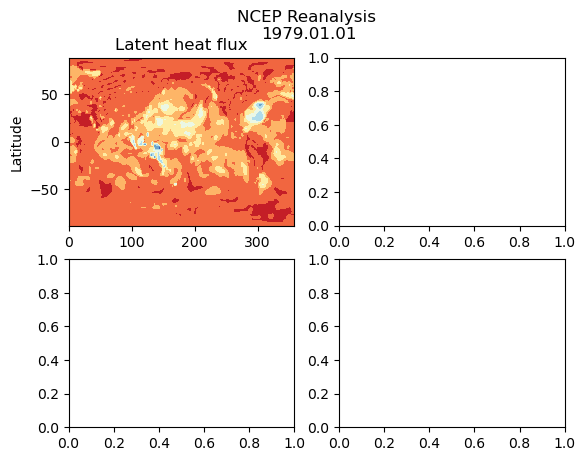

In [3]:
# Figure out how big the datasets are
flux_components['lhtfl'].lhtfl.shape
print(flux_components['lhtfl'])

# Plot the fields
# choose the index of the snapshot to show
itime = 0
data1 = flux_components['lhtfl']
map1 = data1.lhtfl[itime,:,:]

fig, axs = plt.subplots(2,2)
axs[0,0].contourf(data1.lon, data1.lat, map1, cmap='RdYlBu')
axs[0,0].set_title('Latent heat flux')
axs[0,0].set_ylabel('Latitude')

# Cumbersome date time to string
d = data1.time[itime].dt.strftime('%Y.%m.%d').values
fig.suptitle('NCEP Reanalysis \n' + d)


## Add some coastlines to the maps 

We will take a look at the `pygmt` package.
```{seealso}
https://www.pygmt.org/latest/tutorials/basics/coastlines.html#sphx-glr-tutorials-basics-coastlines-py
```

Alternatively, you may prefer `cartopy`
```{seealso}
https://geohackweek.github.io/visualization/03-cartopy/
```

In [4]:
import pygmt


In [5]:


#print(x.shape)
#print(data1.lon.shape)
#print(z.shape)
#print(y.shape)
grid = pygmt.datasets.load_earth_relief(resolution="10m", region=[-108, -103, 35, 40])
#print(grid.shape)
print(grid)


d1 = flux_components['lhtfl']
d2 = d1.sel(time=slice("1979-01-01T00:00:00"))
#print(d2)
d3 = d2['lhtfl']
print(d3)

<xarray.DataArray 'elevation' (lat: 31, lon: 31)>
array([[2271.5, 2103.5, 2031.5, 1910. , 1804.5, 1758. , 1664.5, 1665.5,
        1579. , 1824.5, 2149.5, 2016. , 1912.5, 2002.5, 2102. , 1994. ,
        1861.5, 1746. , 1651.5, 1576.5, 1483. , 1481. , 1484.5, 1481. ,
        1413.5, 1333.5, 1303. , 1306. , 1329. , 1278. , 1293. ],
       [2241.5, 2099.5, 2320. , 2273. , 2004. , 1864.5, 1728.5, 1739. ,
        1616.5, 1939. , 2134. , 2043. , 1956. , 2039. , 2115.5, 1996.5,
        1833. , 1700. , 1614. , 1579.5, 1525.5, 1449.5, 1419.5, 1437. ,
        1380. , 1298.5, 1244.5, 1220.5, 1232.5, 1204. , 1210. ],
       [2149. , 2153. , 2373. , 2526.5, 2327. , 1930.5, 1807.5, 1828. ,
        1694.5, 1748.5, 1862.5, 1981.5, 1927.5, 2023.5, 2151. , 2037. ,
        1896.5, 1805. , 1722. , 1657.5, 1552. , 1442. , 1368. , 1352.5,
        1333. , 1275. , 1222.5, 1199.5, 1193.5, 1168.5, 1142.5],
       [2211. , 2208. , 2144. , 2207.5, 2297. , 1964. , 1885.5, 1809. ,
        1779. , 1770. , 1695. , 184

## PyGMT is a package for plotting

It is especially good for geophysical quantities (and geophysics).

However, the formatting language looks a little different than matplotlib.

We'll take a look at ways to plot maps.

```{seealso}
PyGMT tutorials: [https://www.pygmt.org/latest/tutorials/index.html](https://www.pygmt.org/latest/tutorials/index.html)
```



### `pygmt.contour`

A contour map draws lines or contours representing equal values.  This is what you're used to seeing for a topographic map for hiking, or bathymetry.  But it can be used for other 2-dimensional fields as well.

In *GMT*, the contour function expects a table of x, y and z values.  See below for a stock example from `pygmt`.

Run the following cell.  If you look at the figure created, it's clearly a two-dimensional object.  

1. Check the shape of `x`, `y` and `z`.  Are they 1-dimensional or 2-dimensional?

2. Check the shape of `X`, `Y`, and `Z`.  How many dimensions are they?

3. Read the help on the command `flatten()`.  What does it do?

Now check out the inputs to the function `fig.contour()`.  

4. Where are axis limits specified?

5. What happens if you change the `projection="X5c/20c"`?

6. What if you change `levels=5`?



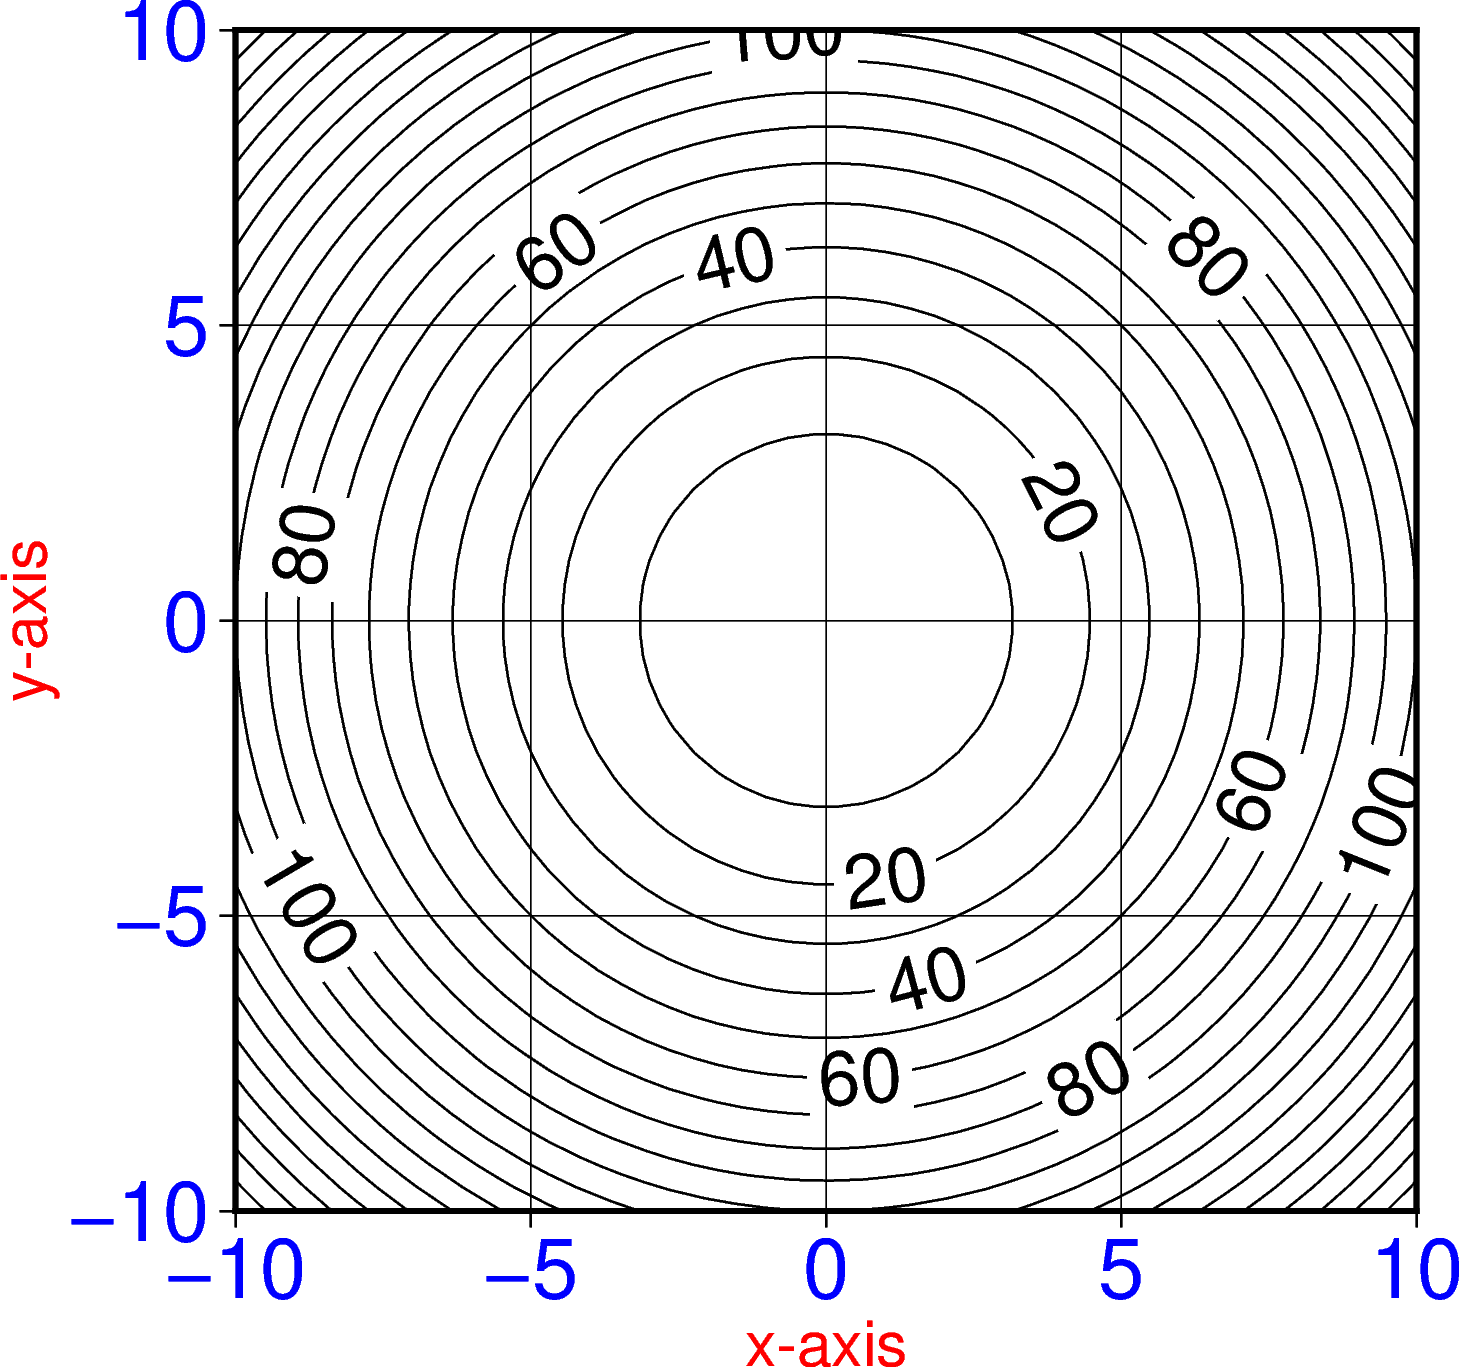

In [6]:
# build the contours underlying data with the function z = x^2 + y^2
X, Y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
Z = X**2 + Y**2
x, y, z = X.flatten(), Y.flatten(), Z.flatten()

pygmt.config(FONT_ANNOT_PRIMARY="12p,Helvetica,blue",
            FONT_ANNOT_SECONDARY="14p,Helvetica,red"
            )

fig = pygmt.Figure()
    
with pygmt.config(FONT_ANNOT_PRIMARY="20p,Helvetica,blue", FONT_LABEL="15p,Helvetica,red"):
    fig.contour(
        region=[-10, 10, -10, 10],
        projection="X10c/10c",
        frame=["ag", "xaf+lx-axis", "yaf+ly-axis"],
        pen="0.5p",
        # pass the data as 3 1-D data columns
        x=x,
        y=y,
        z=z,
        # set the contours z values intervals to 10
        levels=10,
        # set the contours annotation intervals to 20
        annotation="20+f18p",
    )
fig.show()
fig.savefig('pygmt_test.png')

# Your code here

**Compare this to what we normally do for `matplotlib`**

`PyGMT` is clearly different.

In `matplotlib`, we would do something like

For example, suppose we have a dataset with data at 2 latitudes and two longitudes.

lat = [25 30]
lon = [-40 -50 -60]

Z = [[

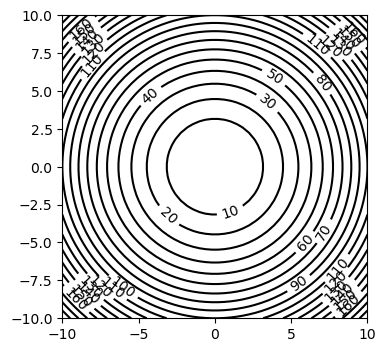

In [7]:
fig, ax = plt.subplots()
CS = plt.contour(X,Y,Z, 20, colors='black')
fig.set_size_inches(10/2.54, 10/2.54)  # The argument projection for pyGMT is in centimeters so we divide centimeters by centimeter-per-inch to get inches
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
fig.savefig('matplotlib_test.png', dpi=300)

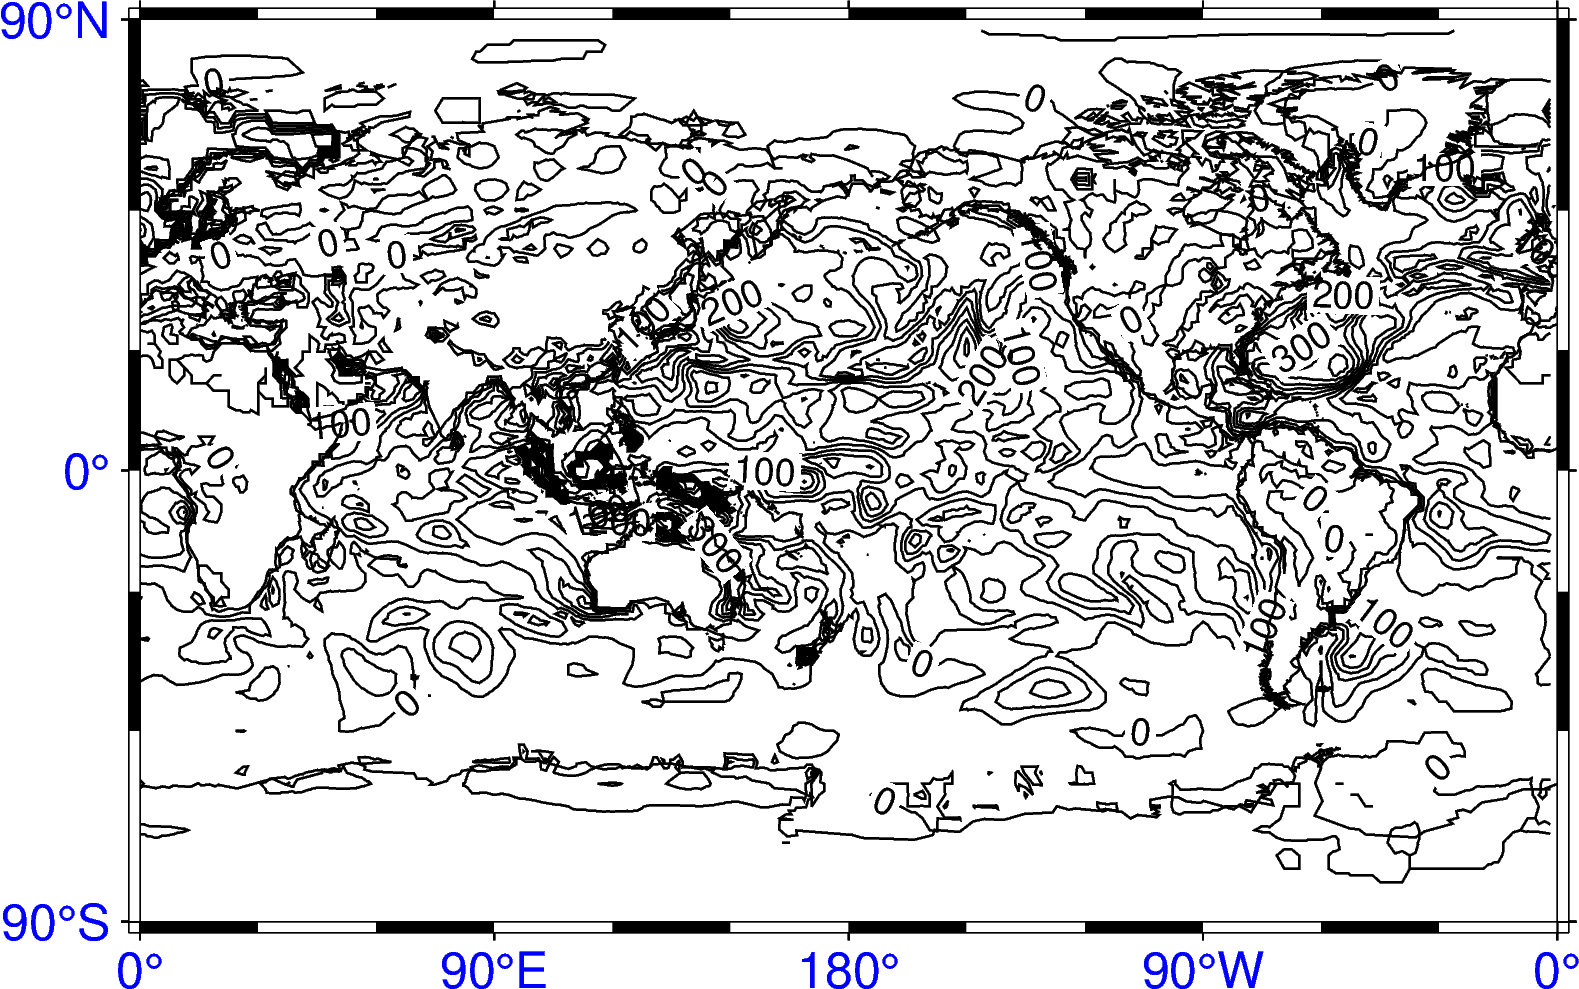

In [8]:
# pygmt.contour requires the x, y and z inputs to be the same size
# Normally for our 
#
X, Y = np.meshgrid(d3.lon,d3.lat)

x, y, z = X.flatten(), Y.flatten(), d3.values.flatten()



fig = pygmt.Figure()
fig.basemap(
    region="g", 
#    projection="W15c", 
    projection="Cyl_stere/12c",
    frame=True
)
fig.coast(shorelines="1/0.5p,black")
fig.contour(
    x=x,
    y=y,
    z=z,
    pen="0.5p", # What stift is used to draw the contours
)
fig.show()

grdimage [WARNING]: The step size of coordinate (Latitude [degrees_north]) in grid ../data/lhtfl.sfc.gauss.1979.nc is not constant.


grdimage [WARNING]: GMT will use a constant step size of -1.90413; the original ranges from -1.9048 to -1.8889.


grdimage [WARNING]: The y-coordinates and range attribute are in conflict; must rely on coordinates only


grdimage [WARNING]: Guessing of registration in conflict between x and y, using gridline


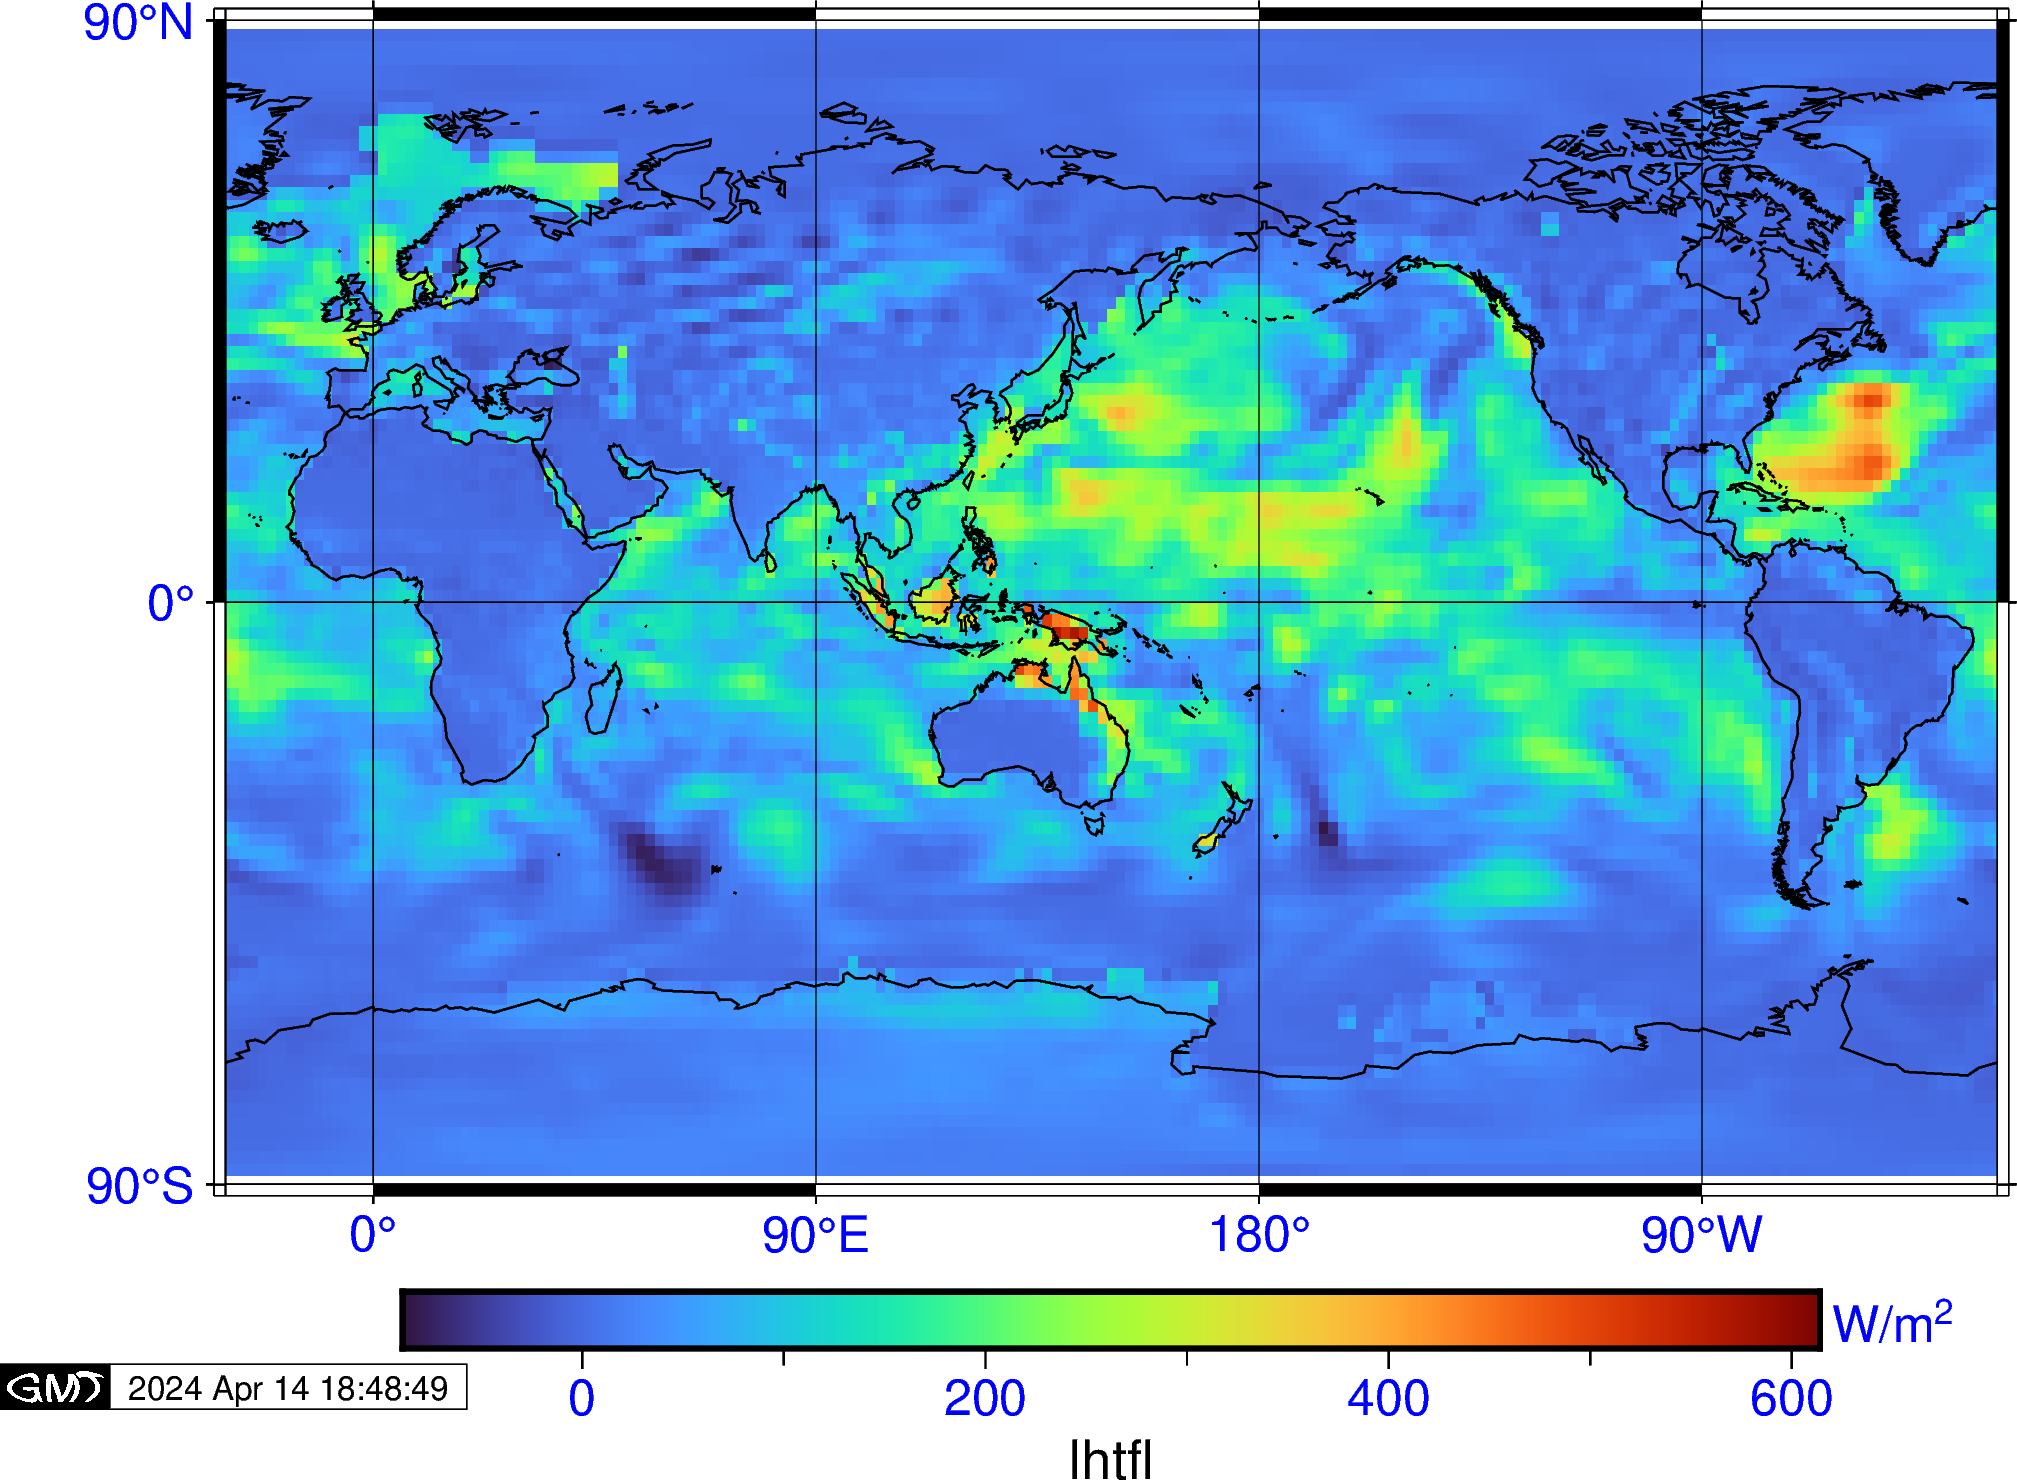

In [9]:
i=0
fname = filepath + fpre[i] + fpost

grid = fname + '?' + fpre[i]

fig = pygmt.Figure()
fig.grdimage(
    grid=grid,
    frame="ag",
    projection="Cyl_stere/150/-20/15c", 
    region="g"
)
fig.coast(shorelines="1/0.5p,black")
fig.timestamp()
fig.colorbar(frame=['x+l' +fpre[i], "y+lW/m@+2@+"])
fig.show()

In [10]:
help(pygmt.Figure.contour)

Help on function contour in module pygmt.src.contour:

contour(self, data=None, x=None, y=None, z=None, *, annotation=None, frame=None, levels=None, label_placement=None, projection=None, triangular_mesh_pen=None, no_clip=None, region=None, skip=None, verbose=None, pen=None, binary=None, panel=None, nodata=None, find=None, coltypes=None, header=None, incols=None, label=None, perspective=None, transparency=None, **kwargs)
    Contour table data by direct triangulation.
    
    Takes a matrix, (x, y, z) triplets, or a file name as input and plots,
    lines, polygons, or symbols at those locations on a map.
    
    Must provide either ``data`` or ``x``, ``y``, and ``z``.
    
    Full option list at :gmt-docs:`contour.html`
    
    **Aliases:**
    
    - A = annotation
    - B = frame
    - C = levels
    - G = label_placement
    - J = projection
    - L = triangular_mesh_pen
    - N = no_clip
    - R = region
    - S = skip
    - V = verbose
    - W = pen
    - b = binary
    - c =